### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_dir_path = "train/"
test_dir_path = "test/"

### Check CSV Files

In [3]:
# load the train, test, sample csv [reset]
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test_files.csv")
sample_submit_df = pd.read_csv("sample_submission.csv")

In [4]:
# print the shape
print(train_df.shape)
# summary statistics
train_df.info()

(59, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patient_id   59 non-null     object
 1   AS           59 non-null     int64 
 2   AR           59 non-null     int64 
 3   MR           59 non-null     int64 
 4   MS           59 non-null     int64 
 5   N            59 non-null     int64 
 6   recording_1  59 non-null     object
 7   recording_2  59 non-null     object
 8   recording_3  59 non-null     object
 9   recording_4  59 non-null     object
 10  recording_5  59 non-null     object
 11  recording_6  59 non-null     object
 12  recording_7  59 non-null     object
 13  recording_8  59 non-null     object
dtypes: int64(5), object(9)
memory usage: 6.6+ KB


In [5]:
# check for the missing values
print(train_df.isnull().sum())
# check for the unique values
print(train_df.nunique())

patient_id     0
AS             0
AR             0
MR             0
MS             0
N              0
recording_1    0
recording_2    0
recording_3    0
recording_4    0
recording_5    0
recording_6    0
recording_7    0
recording_8    0
dtype: int64
patient_id     59
AS              2
AR              2
MR              2
MS              2
N               2
recording_1    59
recording_2    59
recording_3    59
recording_4    59
recording_5    59
recording_6    59
recording_7    59
recording_8    59
dtype: int64


In [6]:
# check test data shape
print(test_df.shape)
# summary statistics
test_df.info()

(49, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patient_id   49 non-null     object
 1   recording_1  49 non-null     object
 2   recording_2  49 non-null     object
 3   recording_3  49 non-null     object
 4   recording_4  49 non-null     object
 5   recording_5  49 non-null     object
 6   recording_6  49 non-null     object
 7   recording_7  49 non-null     object
 8   recording_8  49 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [7]:
# check for null values
print(test_df.isnull().sum())
# check for unique values
print(test_df.nunique())

patient_id     0
recording_1    0
recording_2    0
recording_3    0
recording_4    0
recording_5    0
recording_6    0
recording_7    0
recording_8    0
dtype: int64
patient_id     49
recording_1    49
recording_2    49
recording_3    49
recording_4    49
recording_5    49
recording_6    49
recording_7    49
recording_8    49
dtype: int64


In [8]:
# check the additional metadata
metadata = pd.read_csv("additional_metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  59 non-null     object
 1   Age         59 non-null     int64 
 2   Gender      59 non-null     object
 3   Smoker      59 non-null     int64 
 4   Lives       59 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.4+ KB


In [9]:
# # append the metadata to the train file 
# combined_train_df = train_df.merge(metadata, how="right")
# combined_train_df.info()

In [10]:
# load the sample submission
sample_submit_df = pd.read_csv("sample_submission.csv")
sample_submit_df

,patient_id,AS,AR,MR,MS,N
0,patient_001,0,1,1,0,0
1,patient_003,0,1,0,0,0
2,patient_005,0,0,0,0,1
3,patient_007,1,0,1,1,0


### Exploratory Data Analysis
So we need to predict 5 binary classes as our target variables

AS
0    40
1    19
Name: count, dtype: int64


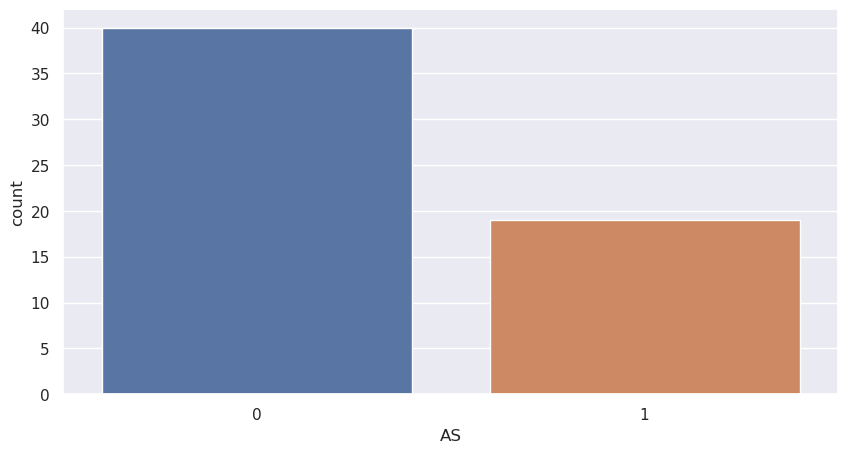

AR
0    38
1    21
Name: count, dtype: int64


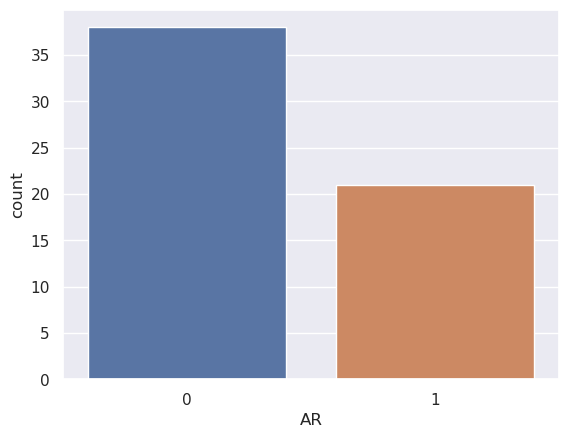

MR
0    36
1    23
Name: count, dtype: int64


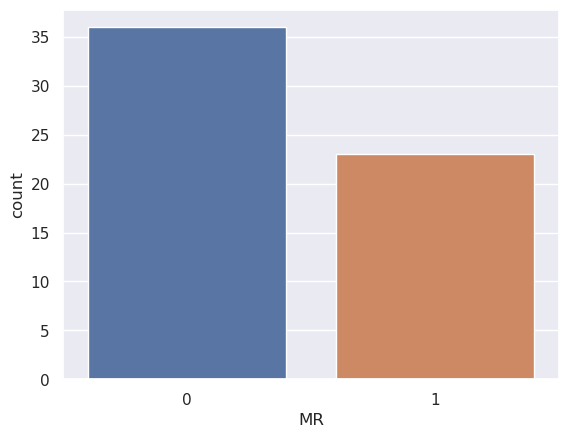

MS
0    36
1    23
Name: count, dtype: int64


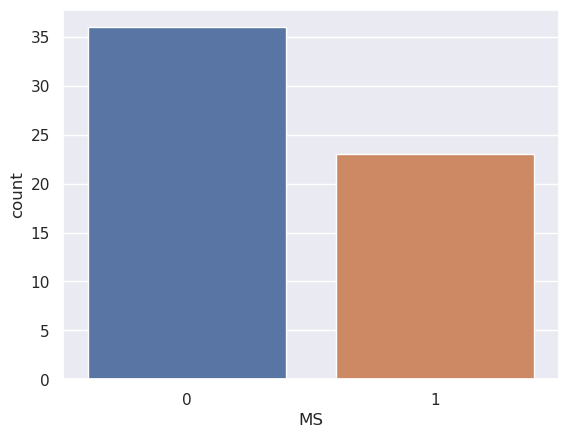

N
0    47
1    12
Name: count, dtype: int64


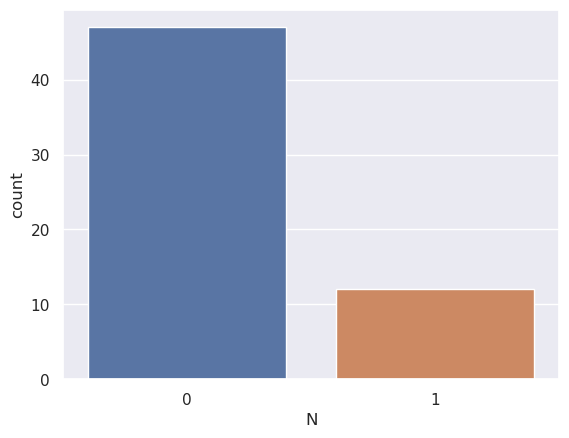

In [11]:
target_classes = ['AS', 'AR', 'MR', 'MS', 'N']
# plot the binary distribution of the target classes
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
for cls in target_classes:
    # print the unique values
    print(train_df[cls].value_counts())
    sns.countplot(x=cls, data=train_df)
    plt.show()

### Checking Metadata

In [12]:
# # check the categorical columns
# categorical_columns = train_df.select_dtypes(include=["object"]).columns
# categorical_columns

In [13]:
# categorical_columns = ['Gender', 'Lives']
# # plot the categorical columns
# for col in categorical_columns:
#     plt.figure(figsize=(10, 5))
#     # print the count of the unique values
#     print(train_df[col].value_counts())
#     sns.countplot(x=col, data=train_df)
#     plt.show()

In [14]:
# # encode the categorical features into numerical
# label_encoder = LabelEncoder()
# for col in categorical_columns:
#     train_df[col] = label_encoder.fit_transform(train_df[col])
#     print(train_df[col].value_counts())

# # Male -> 1
# # Urban -> 1


In [15]:
train_df.head()

,patient_id,AS,AR,MR,MS,N,recording_1,recording_2,recording_3,recording_4,recording_5,recording_6,recording_7,recording_8
0,patient_052,0,1,0,0,0,052_sup_Mit,052_sup_Tri,052_sup_Pul,052_sup_Aor,052_sit_Mit,052_sit_Tri,052_sit_Pul,052_sit_Aor
1,patient_058,0,1,0,0,0,058_sup_Mit,058_sup_Tri,058_sup_Pul,058_sup_Aor,058_sit_Mit,058_sit_Tri,058_sit_Pul,058_sit_Aor
2,patient_068,0,1,0,0,0,068_sup_Mit,068_sup_Tri,068_sup_Pul,068_sup_Aor,068_sit_Mit,068_sit_Tri,068_sit_Pul,068_sit_Aor
3,patient_074,0,1,0,0,0,074_sup_Mit,074_sup_Tri,074_sup_Pul,074_sup_Aor,074_sit_Mit,074_sit_Tri,074_sit_Pul,074_sit_Aor
4,patient_054,1,0,0,0,0,054_sup_Mit,054_sup_Tri,054_sup_Pul,054_sup_Aor,054_sit_Mit,054_sit_Tri,054_sit_Pul,054_sit_Aor


### Processing Audio Files

In [16]:
# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [17]:
# import a sample audio file
audio_file = train_dir_path + "002_sit_Aor.wav"
aud, sr = librosa.load(audio_file, sr=None)
print(f"shape of the audio file: {aud.shape}")
print(f"sample rate: {sr}")

# length of the audio file
print(f"length of the audio file: {len(aud)/sr} seconds")

shape of the audio file: (80000,)
sample rate: 4000
length of the audio file: 20.0 seconds


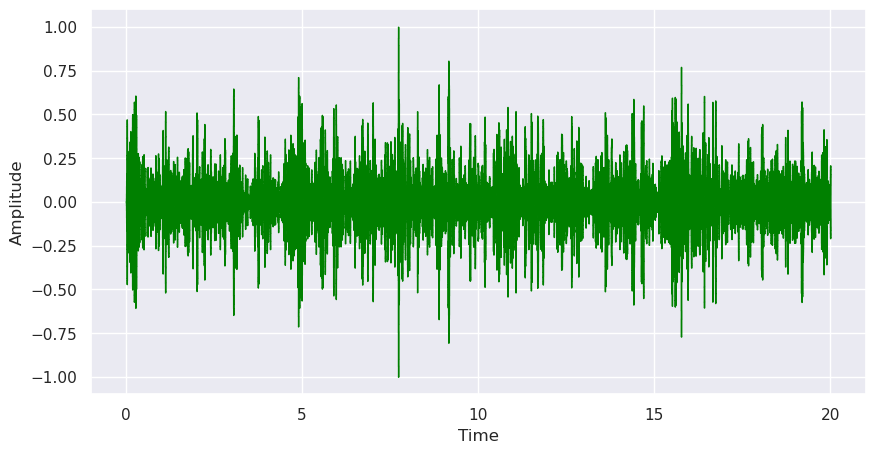

In [18]:
# plot the audio file
plt.figure(figsize=(10, 5))
librosa.display.waveshow(aud, sr=sr, color="green")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [19]:
# play the audio file
ipd.Audio(audio_file)


(513, 313)


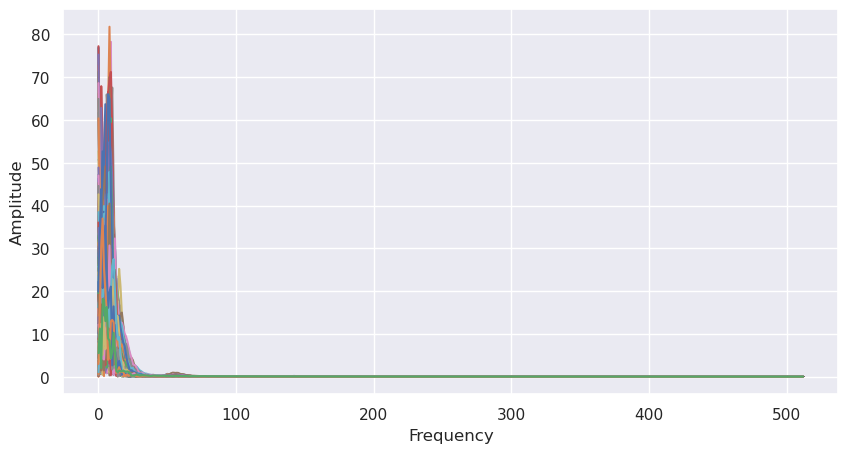

In [20]:
# fast fourier transform
n_fft = 1024 
hop_length = 256 
D = np.abs(librosa.stft(aud, n_fft=n_fft, hop_length=hop_length))
print(D.shape)
plt.figure(figsize=(10, 5))
plt.plot(D)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [21]:
# extract the features from the audio file
# zero crossing rate
# spectral centroid
# spectral bandwidth
# spectral roll-off
# mel-frequency cepstral coefficients (MFCCs)
# chroma feature
# spectral contrast
# tonnetz
# tempogram
# fourier_tempogram

In [22]:
# train_df.head()

In [23]:
# 1. zero crossing rate column for all the audio files
zero_crossing_rate_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"zero_crossing_rate_{i+1}"
    zero_crossing_rate = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        zero_crossing_rate.append(librosa.feature.zero_crossing_rate(aud, frame_length=1024, hop_length=256).mean())
    zero_crossing_rate_list.append(zero_crossing_rate)
    train_df[new_column_name] = zero_crossing_rate

zero_crossing_rate_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"zero_crossing_rate_{i+1}"
    zero_crossing_rate = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        zero_crossing_rate.append(librosa.feature.zero_crossing_rate(aud, frame_length=1024, hop_length=256).mean())
    zero_crossing_rate_list.append(zero_crossing_rate)
    test_df[new_column_name] = zero_crossing_rate


print(train_df.head())
print(test_df.head())
# plot the zero crossing rate
# plt.figure(figsize=(10, 5))
# for i in range(8):
#     plt.plot(zero_crossing_rate_list[i], label=f"recording_{i+1}")
# plt.xlabel("Recordings")
# plt.ylabel("Zero Crossing Rate")
# plt.legend()
# plt.show()
        


    patient_id  AS  AR  MR  MS  N  recording_1  recording_2  recording_3  \
0  patient_052   0   1   0   0  0  052_sup_Mit  052_sup_Tri  052_sup_Pul   
1  patient_058   0   1   0   0  0  058_sup_Mit  058_sup_Tri  058_sup_Pul   
2  patient_068   0   1   0   0  0  068_sup_Mit  068_sup_Tri  068_sup_Pul   
3  patient_074   0   1   0   0  0  074_sup_Mit  074_sup_Tri  074_sup_Pul   
4  patient_054   1   0   0   0  0  054_sup_Mit  054_sup_Tri  054_sup_Pul   

   recording_4  ...  recording_7  recording_8 zero_crossing_rate_1  \
0  052_sup_Aor  ...  052_sit_Pul  052_sit_Aor             0.011647   
1  058_sup_Aor  ...  058_sit_Pul  058_sit_Aor             0.010483   
2  068_sup_Aor  ...  068_sit_Pul  068_sit_Aor             0.009435   
3  074_sup_Aor  ...  074_sit_Pul  074_sit_Aor             0.015466   
4  054_sup_Aor  ...  054_sit_Pul  054_sit_Aor             0.013884   

  zero_crossing_rate_2  zero_crossing_rate_3  zero_crossing_rate_4  \
0             0.009878              0.010249        

In [24]:
# 2. spectral centroid column for all the audio files
spectral_centroid_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_centroid_{i+1}"
    spectral_centroid = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_centroid.append(librosa.feature.spectral_centroid(y=aud, sr=sr).mean())
    spectral_centroid_list.append(spectral_centroid)
    train_df[new_column_name] = spectral_centroid

spectral_centroid_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_centroid_{i+1}"
    spectral_centroid = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_centroid.append(librosa.feature.spectral_centroid(y=aud, sr=sr).mean())
    spectral_centroid_list.append(spectral_centroid)
    test_df[new_column_name] = spectral_centroid

print(train_df.head())
print(test_df.head())

    patient_id  AS  AR  MR  MS  N  recording_1  recording_2  recording_3  \
0  patient_052   0   1   0   0  0  052_sup_Mit  052_sup_Tri  052_sup_Pul   
1  patient_058   0   1   0   0  0  058_sup_Mit  058_sup_Tri  058_sup_Pul   
2  patient_068   0   1   0   0  0  068_sup_Mit  068_sup_Tri  068_sup_Pul   
3  patient_074   0   1   0   0  0  074_sup_Mit  074_sup_Tri  074_sup_Pul   
4  patient_054   1   0   0   0  0  054_sup_Mit  054_sup_Tri  054_sup_Pul   

   recording_4  ... zero_crossing_rate_7 zero_crossing_rate_8  \
0  052_sup_Aor  ...             0.011694             0.012259   
1  058_sup_Aor  ...             0.011697             0.010621   
2  068_sup_Aor  ...             0.011591             0.010580   
3  074_sup_Aor  ...             0.022093             0.015169   
4  054_sup_Aor  ...             0.014471             0.016049   

  spectral_centroid_1 spectral_centroid_2  spectral_centroid_3  \
0           36.012433           30.119606            35.409585   
1           36.03515

In [25]:
# 3. spectral roll-off column for all the audio files
spectral_rolloff_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_rolloff_{i+1}"
    spectral_rolloff = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_rolloff.append(librosa.feature.spectral_rolloff(y=aud, sr=sr).mean())
    spectral_rolloff_list.append(spectral_rolloff)
    train_df[new_column_name] = spectral_rolloff

spectral_rolloff_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_rolloff_{i+1}"
    spectral_rolloff = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_rolloff.append(librosa.feature.spectral_rolloff(y=aud, sr=sr).mean())
    spectral_rolloff_list.append(spectral_rolloff)
    test_df[new_column_name] = spectral_rolloff

print(train_df.head())
print(test_df.head())

    patient_id  AS  AR  MR  MS  N  recording_1  recording_2  recording_3  \
0  patient_052   0   1   0   0  0  052_sup_Mit  052_sup_Tri  052_sup_Pul   
1  patient_058   0   1   0   0  0  058_sup_Mit  058_sup_Tri  058_sup_Pul   
2  patient_068   0   1   0   0  0  068_sup_Mit  068_sup_Tri  068_sup_Pul   
3  patient_074   0   1   0   0  0  074_sup_Mit  074_sup_Tri  074_sup_Pul   
4  patient_054   1   0   0   0  0  054_sup_Mit  054_sup_Tri  054_sup_Pul   

   recording_4  ... spectral_centroid_7 spectral_centroid_8  \
0  052_sup_Aor  ...           38.978882           31.791252   
1  058_sup_Aor  ...           36.858136           40.186995   
2  068_sup_Aor  ...           37.089808           29.473329   
3  074_sup_Aor  ...           53.942232           43.635640   
4  054_sup_Aor  ...           40.473927           41.350842   

  spectral_rolloff_1 spectral_rolloff_2  spectral_rolloff_3  \
0          52.199443          50.731489           53.667396   
1          56.167894          52.11236

In [26]:
# 4. spectral bandwidth column for all the audio files
spectral_bandwidth_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_bandwidth_{i+1}"
    spectral_bandwidth = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_bandwidth.append(librosa.feature.spectral_bandwidth(y=aud, sr=sr).mean())
    spectral_bandwidth_list.append(spectral_bandwidth)
    train_df[new_column_name] = spectral_bandwidth

spectral_bandwidth_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_bandwidth_{i+1}"
    spectral_bandwidth = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_bandwidth.append(librosa.feature.spectral_bandwidth(y=aud, sr=sr).mean())
    spectral_bandwidth_list.append(spectral_bandwidth)
    test_df[new_column_name] = spectral_bandwidth

In [27]:
# 5. spectral contrast column for all the audio files
spectral_contrast_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_contrast_{i+1}"
    spectral_contrast = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_contrast.append(librosa.feature.spectral_contrast(y=aud, sr=sr, n_bands=4).mean())
    spectral_contrast_list.append(spectral_contrast)
    train_df[new_column_name] = spectral_contrast

spectral_contrast_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_contrast_{i+1}"
    spectral_contrast = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_contrast.append(librosa.feature.spectral_contrast(y=aud, sr=sr, n_bands=4).mean())
    spectral_contrast_list.append(spectral_contrast)
    test_df[new_column_name] = spectral_contrast

In [28]:
# 6. mel-frequency cepstral coefficients (MFCCs) column for all the audio files
mfcc_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"mfcc_{i+1}"
    mfcc = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        mfcc.append(librosa.feature.mfcc(y=aud, sr=sr, n_mfcc=13).mean())
    mfcc_list.append(mfcc)
    train_df[new_column_name] = mfcc

mfcc_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"mfcc_{i+1}"
    mfcc = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        mfcc.append(librosa.feature.mfcc(y=aud, sr=sr, n_mfcc=13).mean())
    mfcc_list.append(mfcc)
    test_df[new_column_name] = mfcc

print(train_df.head())
print(test_df.head())

    patient_id  AS  AR  MR  MS  N  recording_1  recording_2  recording_3  \
0  patient_052   0   1   0   0  0  052_sup_Mit  052_sup_Tri  052_sup_Pul   
1  patient_058   0   1   0   0  0  058_sup_Mit  058_sup_Tri  058_sup_Pul   
2  patient_068   0   1   0   0  0  068_sup_Mit  068_sup_Tri  068_sup_Pul   
3  patient_074   0   1   0   0  0  074_sup_Mit  074_sup_Tri  074_sup_Pul   
4  patient_054   1   0   0   0  0  054_sup_Mit  054_sup_Tri  054_sup_Pul   

   recording_4  ... spectral_contrast_7 spectral_contrast_8    mfcc_1  \
0  052_sup_Aor  ...           20.750995           20.735570  0.224835   
1  058_sup_Aor  ...           20.570011           21.003508 -0.538351   
2  068_sup_Aor  ...           20.973174           21.073881  1.290197   
3  074_sup_Aor  ...           20.358778           20.568860  3.422509   
4  054_sup_Aor  ...           20.901647           21.100362 -0.673437   

     mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7    mfcc_8  
0  2.600199  1.338784  0.22341

In [29]:
# 7. chroma feature column for all the audio files
chroma_stft_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"chroma_stft_{i+1}"
    chroma_stft = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        chroma_stft.append(librosa.feature.chroma_stft(y=aud, sr=sr).mean())
    chroma_stft_list.append(chroma_stft)
    train_df[new_column_name] = chroma_stft

chroma_stft_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"chroma_stft_{i+1}"
    chroma_stft = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        chroma_stft.append(librosa.feature.chroma_stft(y=aud, sr=sr).mean())
    chroma_stft_list.append(chroma_stft)
    test_df[new_column_name] = chroma_stft

print(train_df.head())
print(test_df.head())

    patient_id  AS  AR  MR  MS  N  recording_1  recording_2  recording_3  \
0  patient_052   0   1   0   0  0  052_sup_Mit  052_sup_Tri  052_sup_Pul   
1  patient_058   0   1   0   0  0  058_sup_Mit  058_sup_Tri  058_sup_Pul   
2  patient_068   0   1   0   0  0  068_sup_Mit  068_sup_Tri  068_sup_Pul   
3  patient_074   0   1   0   0  0  074_sup_Mit  074_sup_Tri  074_sup_Pul   
4  patient_054   1   0   0   0  0  054_sup_Mit  054_sup_Tri  054_sup_Pul   

   recording_4  ...    mfcc_7    mfcc_8 chroma_stft_1 chroma_stft_2  \
0  052_sup_Aor  ...  0.052358  1.830732      0.596780      0.639823   
1  058_sup_Aor  ... -2.109795  2.050233      0.641338      0.643506   
2  068_sup_Aor  ...  0.824258 -0.672298      0.553953      0.587506   
3  074_sup_Aor  ...  2.619133 -1.048574      0.605895      0.641213   
4  054_sup_Aor  ...  0.861668  0.979162      0.615734      0.625114   

   chroma_stft_3  chroma_stft_4  chroma_stft_5  chroma_stft_6  chroma_stft_7  \
0       0.601512       0.545747     

In [30]:
# 8+9. harmonics and perceptrual column for all the audio files
harmonics_list = []
perceptrual_list = []

for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name_harmonics = f"harmonics_{i+1}"
    new_column_name_perceptrual = f"perceptrual_{i+1}"
    harmonics = []
    perceptrual = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        harmonics.append(librosa.effects.harmonic(y=aud).mean())
        perceptrual.append(librosa.effects.percussive(y=aud).mean())
    harmonics_list.append(harmonics)
    perceptrual_list.append(perceptrual)
    train_df[new_column_name_harmonics] = harmonics
    train_df[new_column_name_perceptrual] = perceptrual

harmonics_list = []
perceptrual_list = []

for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name_harmonics = f"harmonics_{i+1}"
    new_column_name_perceptrual = f"perceptrual_{i+1}"
    harmonics = []
    perceptrual = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        harmonics.append(librosa.effects.harmonic(y=aud).mean())
        perceptrual.append(librosa.effects.percussive(y=aud).mean())
    harmonics_list.append(harmonics)
    perceptrual_list.append(perceptrual)
    test_df[new_column_name_harmonics] = harmonics
    test_df[new_column_name_perceptrual] = perceptrual

In [31]:
# 10. tempo bpm column for all the audio files
tempo_bpm_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"tempo_bpm_{i+1}"
    tempo_bpm = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        tempo_bpm.append(librosa.beat.tempo(y=aud, sr=sr).mean())
    tempo_bpm_list.append(tempo_bpm)
    train_df[new_column_name] = tempo_bpm

tempo_bpm_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"tempo_bpm_{i+1}"
    tempo_bpm = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        tempo_bpm.append(librosa.beat.tempo(y=aud, sr=sr).mean())
    tempo_bpm_list.append(tempo_bpm)
    test_df[new_column_name] = tempo_bpm

In [32]:
# 11. tonnetz column for all the audio files
tonnetz_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"tonnetz_{i+1}"
    tonnetz = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        tonnetz.append(librosa.feature.tonnetz(y=aud, sr=sr, chroma=librosa.feature.chroma_stft(y=aud, sr=sr)).mean())
    tonnetz_list.append(tonnetz)
    train_df[new_column_name] = tonnetz

tonnetz_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"tonnetz_{i+1}"
    tonnetz = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        tonnetz.append(librosa.feature.tonnetz(y=aud, sr=sr, chroma=librosa.feature.chroma_stft(y=aud, sr=sr)).mean())
    tonnetz_list.append(tonnetz)
    test_df[new_column_name] = tonnetz

In [33]:
# # 12. fourier_tempogram column for all the audio files
# fourier_tempogram_list = []
# for i in range(8):
#     column_name = f"recording_{i+1}"
#     new_column_name = f"fourier_tempogram_{i+1}"
#     fourier_tempogram = []
#     for audio_file in train_df[column_name]:
#         file_path = train_dir_path + audio_file + ".wav"
#         aud, sr = librosa.load(file_path, sr=None)
#         fourier_tempogram.append(librosa.feature.fourier_tempogram(y=aud, sr=sr).mean())
#     fourier_tempogram_list.append(fourier_tempogram)
#     train_df[new_column_name] = fourier_tempogram

# fourier_tempogram_list = []
# for i in range(8):
#     column_name = f"recording_{i+1}"
#     new_column_name = f"fourier_tempogram_{i+1}"
#     fourier_tempogram = []
#     for audio_file in test_df[column_name]:
#         file_path = test_dir_path + audio_file + ".wav"
#         aud, sr = librosa.load(file_path, sr=None)
#         fourier_tempogram.append(librosa.feature.fourier_tempogram(y=aud, sr=sr).mean())
#     fourier_tempogram_list.append(fourier_tempogram)
#     test_df[new_column_name] = fourier_tempogram

In [34]:
# 13. poly_features column for all the audio files
poly_features_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"poly_features_{i+1}"
    poly_features = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        poly_features.append(librosa.feature.poly_features(y=aud, sr=sr).mean())
    poly_features_list.append(poly_features)
    train_df[new_column_name] = poly_features

poly_features_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"poly_features_{i+1}"
    poly_features = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        poly_features.append(librosa.feature.poly_features(y=aud, sr=sr).mean())
    poly_features_list.append(poly_features)
    test_df[new_column_name] = poly_features

In [35]:
# 14. rms column for all the audio files
rms_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"rms_{i+1}"
    rms = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        rms.append(librosa.feature.rms(y=aud).mean())
    rms_list.append(rms)
    train_df[new_column_name] = rms

rms_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"rms_{i+1}"
    rms = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        rms.append(librosa.feature.rms(y=aud).mean())
    rms_list.append(rms)
    test_df[new_column_name] = rms

In [36]:
# 15. spectral_flatness column for all the audio files
spectral_flatness_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_flatness_{i+1}"
    spectral_flatness = []
    for audio_file in train_df[column_name]:
        file_path = train_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_flatness.append(librosa.feature.spectral_flatness(y=aud).mean())
    spectral_flatness_list.append(spectral_flatness)
    train_df[new_column_name] = spectral_flatness

spectral_flatness_list = []
for i in range(8):
    column_name = f"recording_{i+1}"
    new_column_name = f"spectral_flatness_{i+1}"
    spectral_flatness = []
    for audio_file in test_df[column_name]:
        file_path = test_dir_path + audio_file + ".wav"
        aud, sr = librosa.load(file_path, sr=None)
        spectral_flatness.append(librosa.feature.spectral_flatness(y=aud).mean())
    spectral_flatness_list.append(spectral_flatness)
    test_df[new_column_name] = spectral_flatness

In [37]:
# drop all the recording name columns from the train and test data
train_df.drop(columns=[f"recording_{i+1}" for i in range(8)], inplace=True)
test_df.drop(columns=[f"recording_{i+1}" for i in range(8)], inplace=True)

# check the shape of the train and test data
print(train_df.shape)
print(test_df.shape)

(59, 118)
(49, 113)


In [38]:
# split the train data into features and target
train_ids = train_df["patient_id"]
test_ids = test_df["patient_id"]
X = train_df.drop(columns=["patient_id", "AS", "AR", "MR", "MS", "N"])
y = train_df[["AS", "AR", "MR", "MS", "N"]]
test_df = test_df.drop(columns=["patient_id"])
print(X.shape)
print(y.shape)
print(test_df.shape)

(59, 112)
(59, 5)
(49, 112)


In [39]:
# # find out which column contains complex numbers and drop those 
# complex_columns = []
# for col in X.columns:
#     if np.iscomplexobj(X[col]):
#         complex_columns.append(col)

# print(complex_columns)

# # drop the complex columns
# X = X.drop(columns=complex_columns)
# y = y.drop(columns=complex_columns)


non-zero count for AS: 84
top features for AS: Index(['zero_crossing_rate_1', 'zero_crossing_rate_2', 'zero_crossing_rate_3',
       'zero_crossing_rate_4', 'zero_crossing_rate_5', 'zero_crossing_rate_6',
       'zero_crossing_rate_7', 'zero_crossing_rate_8', 'spectral_centroid_1',
       'spectral_centroid_2', 'spectral_centroid_3', 'spectral_centroid_4',
       'spectral_centroid_5', 'spectral_centroid_6', 'spectral_centroid_7',
       'spectral_centroid_8', 'spectral_rolloff_1', 'spectral_rolloff_3',
       'spectral_rolloff_4', 'spectral_rolloff_6', 'spectral_rolloff_7',
       'spectral_rolloff_8', 'spectral_bandwidth_1', 'spectral_bandwidth_2',
       'spectral_bandwidth_4', 'spectral_bandwidth_6', 'spectral_bandwidth_7',
       'spectral_bandwidth_8', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_4', 'spectral_contrast_7', 'spectral_contrast_8',
       'mfcc_3', 'mfcc_4', 'mfcc_6', 'chroma_stft_1', 'chroma_stft_2',
       'chroma_stft_3', 'chroma_stft_5

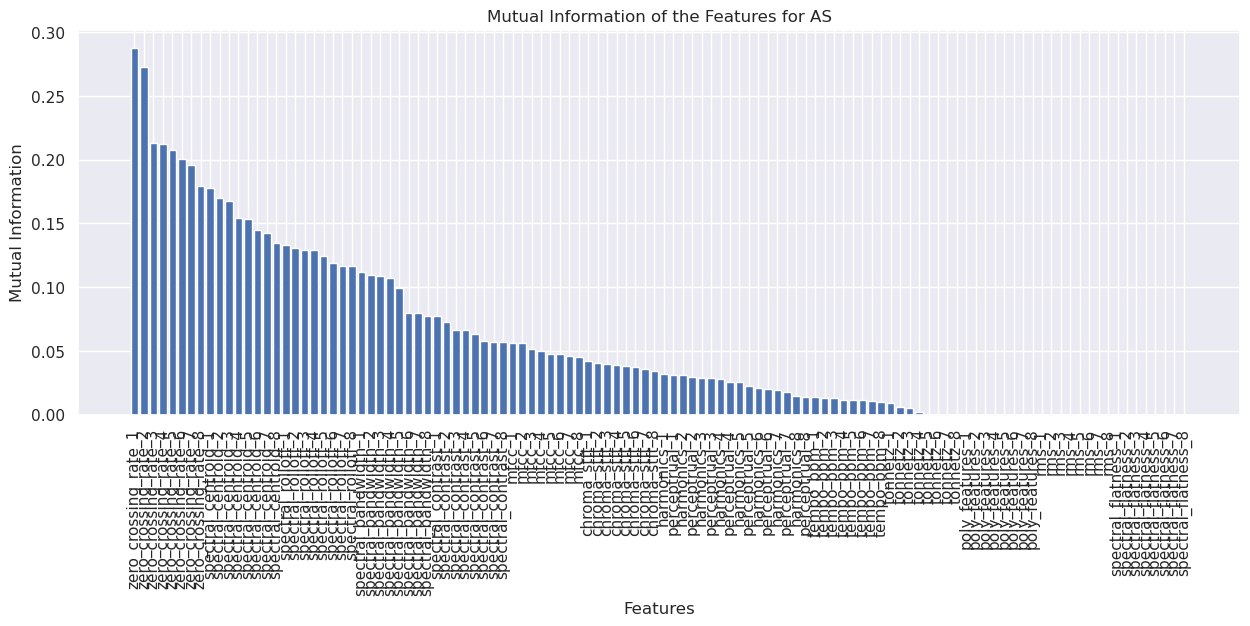

non-zero count for AR: 69
top features for AR: Index(['zero_crossing_rate_1', 'zero_crossing_rate_2', 'zero_crossing_rate_3',
       'zero_crossing_rate_4', 'zero_crossing_rate_5', 'zero_crossing_rate_6',
       'zero_crossing_rate_7', 'zero_crossing_rate_8', 'spectral_centroid_3',
       'spectral_centroid_4', 'spectral_centroid_7', 'spectral_centroid_8',
       'spectral_rolloff_4', 'spectral_rolloff_7', 'spectral_bandwidth_1',
       'spectral_bandwidth_3', 'spectral_bandwidth_4', 'spectral_bandwidth_5',
       'spectral_bandwidth_6', 'spectral_bandwidth_7', 'spectral_contrast_1',
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_7', 'spectral_contrast_8', 'mfcc_1', 'mfcc_2',
       'mfcc_3', 'mfcc_4', 'mfcc_6', 'mfcc_8', 'chroma_stft_2',
       'chroma_stft_4', 'chroma_stft_5', 'chroma_stft_7', 'chroma_stft_8',
       'harmonics_1', 'perceptrual_1', 'harmonics_2', 'perceptrual_2',
       'harmonics_3', 'perceptrual_3', 'harmonics_

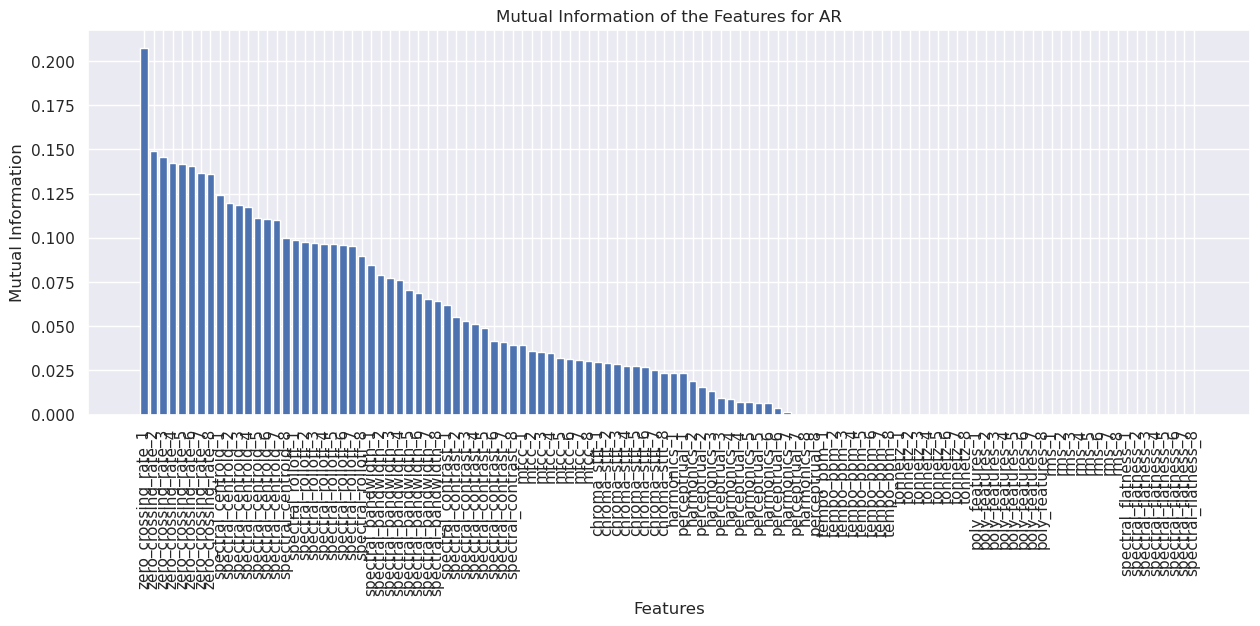

non-zero count for MR: 58
top features for MR: Index(['zero_crossing_rate_1', 'zero_crossing_rate_2', 'zero_crossing_rate_3',
       'zero_crossing_rate_4', 'zero_crossing_rate_5', 'zero_crossing_rate_6',
       'zero_crossing_rate_7', 'zero_crossing_rate_8', 'spectral_centroid_2',
       'spectral_centroid_3', 'spectral_centroid_4', 'spectral_centroid_5',
       'spectral_centroid_7', 'spectral_centroid_8', 'spectral_rolloff_1',
       'spectral_rolloff_2', 'spectral_rolloff_4', 'spectral_rolloff_6',
       'spectral_rolloff_8', 'spectral_bandwidth_2', 'spectral_bandwidth_3',
       'spectral_bandwidth_5', 'spectral_bandwidth_6', 'spectral_bandwidth_8',
       'spectral_contrast_2', 'spectral_contrast_4', 'spectral_contrast_8',
       'mfcc_1', 'mfcc_5', 'mfcc_6', 'mfcc_8', 'chroma_stft_1',
       'chroma_stft_2', 'chroma_stft_3', 'chroma_stft_5', 'chroma_stft_6',
       'harmonics_2', 'harmonics_3', 'perceptrual_3', 'harmonics_4',
       'harmonics_5', 'harmonics_6', 'harmonics_8', '

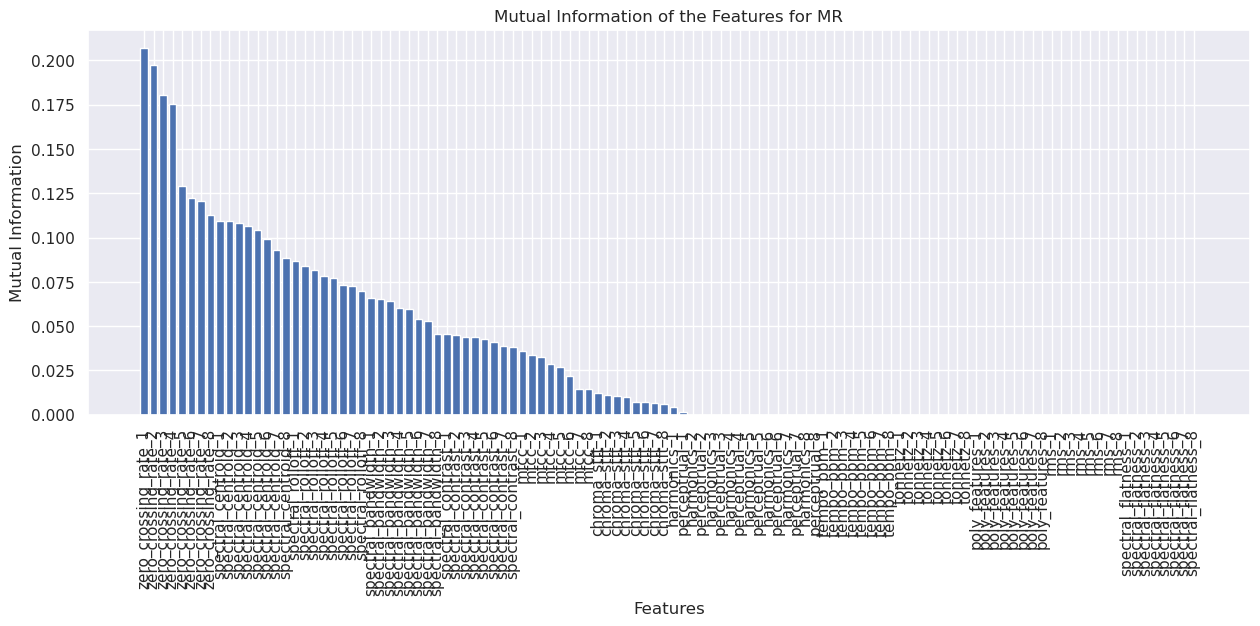

non-zero count for MS: 61
top features for MS: Index(['zero_crossing_rate_1', 'zero_crossing_rate_5', 'zero_crossing_rate_8',
       'spectral_centroid_1', 'spectral_centroid_2', 'spectral_centroid_4',
       'spectral_centroid_5', 'spectral_centroid_7', 'spectral_centroid_8',
       'spectral_rolloff_1', 'spectral_rolloff_3', 'spectral_rolloff_4',
       'spectral_rolloff_6', 'spectral_rolloff_8', 'spectral_bandwidth_1',
       'spectral_bandwidth_3', 'spectral_bandwidth_4', 'spectral_bandwidth_6',
       'spectral_bandwidth_8', 'spectral_contrast_1', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_7', 'spectral_contrast_8',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_8', 'chroma_stft_2',
       'chroma_stft_6', 'harmonics_2', 'harmonics_3', 'harmonics_4',
       'harmonics_6', 'harmonics_7', 'harmonics_8', 'tempo_bpm_3',
       'tempo_bpm_4', 'tempo_bpm_5', 'tempo_bpm_6', 'tempo_bpm_7',
       'tempo_bpm_8', 'tonnetz_3', 'tonnetz_6', 'tonnetz_8', 'poly_features

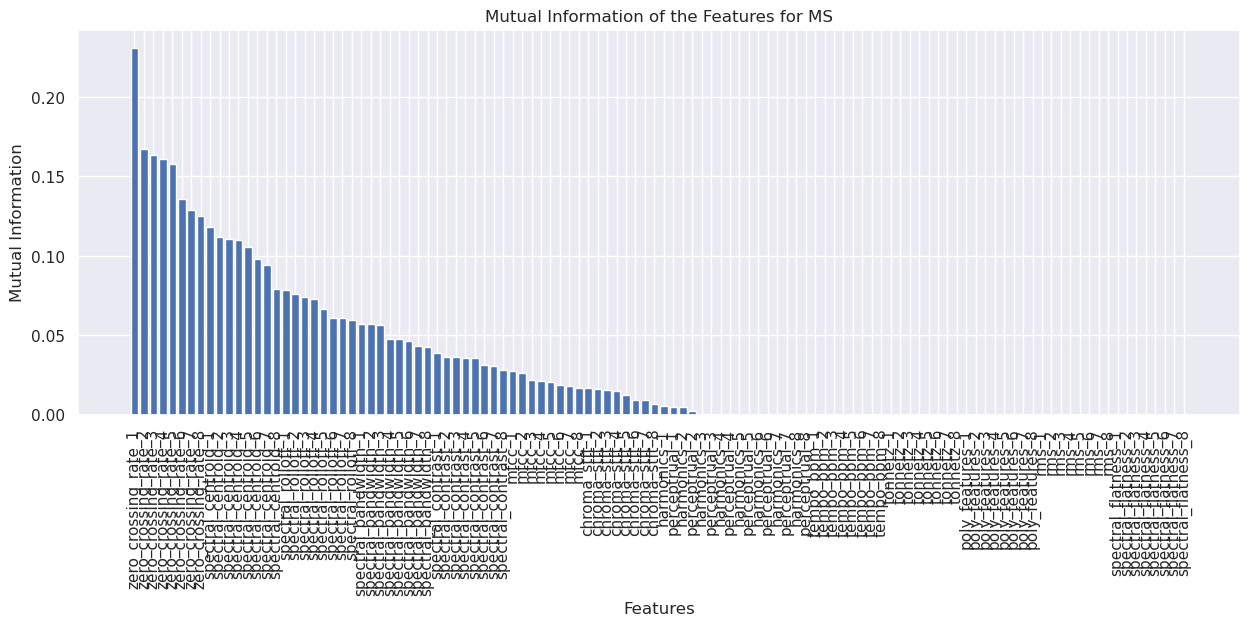

non-zero count for N: 80
top features for N: Index(['zero_crossing_rate_1', 'zero_crossing_rate_2', 'zero_crossing_rate_3',
       'zero_crossing_rate_4', 'zero_crossing_rate_5', 'zero_crossing_rate_6',
       'zero_crossing_rate_7', 'zero_crossing_rate_8', 'spectral_centroid_1',
       'spectral_centroid_2', 'spectral_centroid_3', 'spectral_centroid_4',
       'spectral_centroid_5', 'spectral_centroid_7', 'spectral_centroid_8',
       'spectral_rolloff_2', 'spectral_rolloff_3', 'spectral_rolloff_7',
       'spectral_rolloff_8', 'spectral_bandwidth_1', 'spectral_bandwidth_2',
       'spectral_bandwidth_3', 'spectral_bandwidth_4', 'spectral_bandwidth_7',
       'spectral_bandwidth_8', 'spectral_contrast_1', 'spectral_contrast_3',
       'spectral_contrast_4', 'spectral_contrast_5', 'spectral_contrast_6',
       'spectral_contrast_7', 'spectral_contrast_8', 'mfcc_2', 'mfcc_5',
       'mfcc_7', 'mfcc_8', 'chroma_stft_2', 'chroma_stft_4', 'chroma_stft_6',
       'chroma_stft_7', 'chroma_st

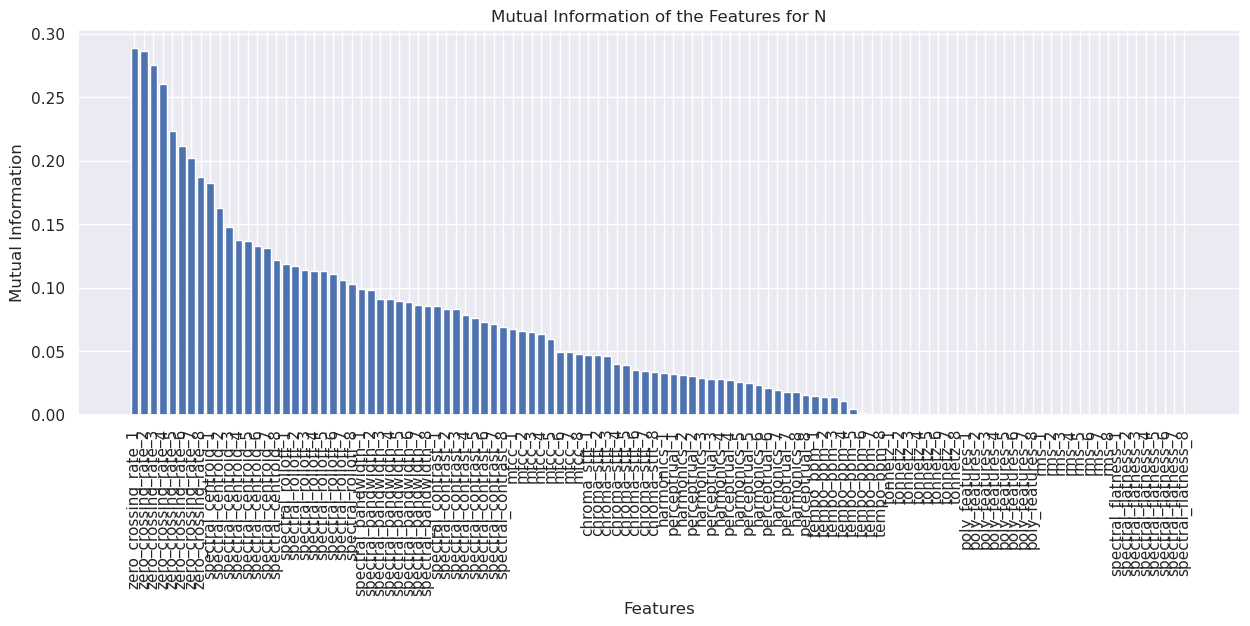

intersection features: {'harmonics_8', 'harmonics_4', 'spectral_centroid_4', 'zero_crossing_rate_1', 'spectral_centroid_7', 'spectral_centroid_8', 'harmonics_3', 'zero_crossing_rate_5', 'spectral_contrast_8', 'chroma_stft_2', 'rms_3', 'zero_crossing_rate_8', 'spectral_contrast_4', 'harmonics_2'}, total: 14
union features: {'chroma_stft_8', 'harmonics_8', 'rms_1', 'spectral_contrast_1', 'spectral_flatness_4', 'tempo_bpm_2', 'chroma_stft_5', 'spectral_centroid_1', 'chroma_stft_2', 'perceptrual_1', 'tonnetz_6', 'poly_features_5', 'spectral_bandwidth_7', 'spectral_contrast_3', 'spectral_contrast_5', 'spectral_flatness_5', 'spectral_flatness_3', 'perceptrual_5', 'spectral_centroid_5', 'perceptrual_4', 'spectral_centroid_8', 'mfcc_3', 'chroma_stft_3', 'mfcc_1', 'spectral_bandwidth_8', 'chroma_stft_1', 'spectral_contrast_4', 'spectral_rolloff_8', 'mfcc_4', 'tonnetz_1', 'tempo_bpm_1', 'harmonics_4', 'spectral_rolloff_1', 'spectral_bandwidth_6', 'spectral_rolloff_4', 'spectral_bandwidth_3', 'ch

In [40]:
# show the top features using information gain
from sklearn.feature_selection import mutual_info_classif
# save the top feature names for each target class and finally take their intersection and union
top_features = []
for cls in target_classes:
    # check the top features for each target class
    mi = mutual_info_classif(X, y[cls])
    # get the count of all non-zero values in the mutual information
    non_zero_count = np.count_nonzero(mi)
    print(f"non-zero count for {cls}: {non_zero_count}")
    # now save the non-zero feature names for each target class and finally take their intersection and union
    top_features.append(X.columns[mi > 0])
    print(f"top features for {cls}: {X.columns[mi > 0]}")
    # plot the sorted mutual information of the features
    plt.figure(figsize=(15, 5))
    plt.bar(X.columns, sorted(mi, reverse=True))
    plt.xlabel("Features")
    plt.ylabel("Mutual Information")
    plt.xticks(rotation=90)
    plt.title(f"Mutual Information of the Features for {cls}")
    plt.show()

# take the intersection and union of the top features
intersection_features = set(top_features[0]).intersection(*top_features)
union_features = set(top_features[0]).union(*top_features)
print(f"intersection features: {intersection_features}, total: {len(intersection_features)}")
print(f"union features: {union_features}, total: {len(union_features)}")


### chroma and mfcc not so important

In [41]:
# drop all the chroma features from the train and test data

In [42]:
# # random forest classifier
# rf = RandomForestClassifier(n_estimators=10000, random_state=42)
# rf.fit(X, y)
# y_pred = rf.predict(test_df)
# y_pred

# # create a submission file
# submission = pd.DataFrame({
#     "patient_id": test_ids,
#     "AS": y_pred[:, 0],
#     "AR": y_pred[:, 1],
#     "MR": y_pred[:, 2],
#     "MS": y_pred[:, 3],
#     "N": y_pred[:, 4]
# })
# submission.to_csv("submission_random_forest_10000.csv", index=False)


# # xgboost classifier
# from xgboost import XGBClassifier
# xgb = XGBClassifier()

# xgb.fit(X, y)
# y_pred = xgb.predict(test_df)
# y_pred

# # create a submission file
# submission = pd.DataFrame({
#     "patient_id": test_ids,
#     "AS": y_pred[:, 0],
#     "AR": y_pred[:, 1],
#     "MR": y_pred[:, 2],
#     "MS": y_pred[:, 3],
#     "N": y_pred[:, 4]
# })

# submission.to_csv("submission_xgboost.csv", index=False)


# # mlp classifier
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(random_state=42)
# mlp.fit(X, y)
# y_pred = mlp.predict(test_df)
# y_pred

# # create a submission file
# submission = pd.DataFrame({
#     "patient_id": test_ids,
#     "AS": y_pred[:, 0],
#     "AR": y_pred[:, 1],
#     "MR": y_pred[:, 2],
#     "MS": y_pred[:, 3],
#     "N": y_pred[:, 4]
# })

# submission.to_csv("submission_mlp.csv", index=False)


# # extra trees classifier
# from sklearn.ensemble import ExtraTreesClassifier
# etc = ExtraTreesClassifier(random_state=42)
# etc.fit(X, y)
# y_pred = etc.predict(test_df)
# y_pred

# # create a submission file
# submission = pd.DataFrame({
#     "patient_id": test_ids,
#     "AS": y_pred[:, 0],
#     "AR": y_pred[:, 1],
#     "MR": y_pred[:, 2],
#     "MS": y_pred[:, 3],
#     "N": y_pred[:, 4]
# })

# submission.to_csv("submission_etc.csv", index=False)

In [43]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred = dt.predict(test_df)
train_accuracy = accuracy_score(y, dt.predict(X))
print(f"train accuracy: {train_accuracy}")

# create a submission file
submission = pd.DataFrame({
    "patient_id": test_ids,
    "AS": y_pred[:, 0],
    "AR": y_pred[:, 1],
    "MR": y_pred[:, 2],
    "MS": y_pred[:, 3],
    "N": y_pred[:, 4]
})

submission.to_csv("submission_decision_tree_112_ft.csv", index=False)

train accuracy: 1.0


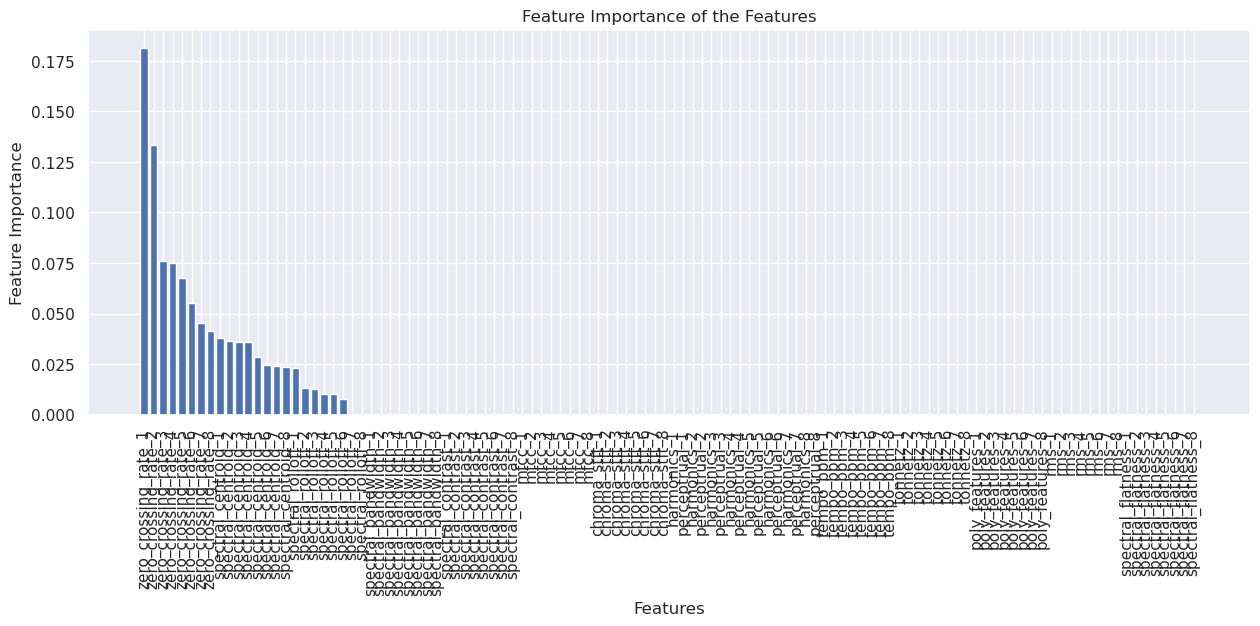

top 25 features: Index(['spectral_centroid_7', 'zero_crossing_rate_8', 'chroma_stft_8',
       'spectral_rolloff_6', 'harmonics_2', 'perceptrual_3', 'harmonics_7',
       'spectral_rolloff_3', 'zero_crossing_rate_7', 'zero_crossing_rate_6',
       'zero_crossing_rate_4', 'spectral_rolloff_5', 'poly_features_5',
       'harmonics_5', 'rms_4', 'spectral_flatness_6', 'spectral_centroid_6',
       'rms_2', 'spectral_flatness_7', 'spectral_centroid_5',
       'poly_features_8', 'harmonics_3', 'spectral_contrast_8',
       'spectral_contrast_7', 'spectral_contrast_6'],
      dtype='object')


In [51]:
# feature importance of the decision tree
feature_importance = dt.feature_importances_
plt.figure(figsize=(15, 5))
plt.bar(X.columns, sorted(feature_importance, reverse=True))
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance of the Features")
plt.show()


# select the top 25 features from the sorted values of the feature importance
top_25_features = X.columns[np.argsort(feature_importance)[::-1][:25]]
print(f"top 25 features: {top_25_features}")

In [52]:
# only keep these features in the train and test data
X = X[top_25_features]
test_df = test_df[top_25_features]

# now run decision tree classifier again on these features
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred = dt.predict(test_df)
train_accuracy = dt.score(X, y)
print(f"Train accuracy: {train_accuracy}")

# create a submission file
submission = pd.DataFrame({
    "patient_id": test_ids,
    "AS": y_pred[:, 0],
    "AR": y_pred[:, 1],
    "MR": y_pred[:, 2],
    "MS": y_pred[:, 3],
    "N": y_pred[:, 4]
})

submission.to_csv("submission_decision_tree_25_features.csv", index=False)

Train accuracy: 1.0
